In [9]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
from cmehr.utils.file_utils import load_pkl
from cmehr.models.common.model_PANTHER import PANTHER, PrototypeTokenizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
file_path = "/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_ihm/self_supervised_embs.pkl"
data_dict = load_pkl(file_path)

In [11]:
prototype_file = "/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_ihm/train_proto_50.pkl"
model = PANTHER(proto_path=prototype_file)

In [12]:
train_ts_emb = torch.from_numpy(data_dict["train_ts_embs"])
test_ts_emb = torch.from_numpy(data_dict["test_ts_embs"])

In [31]:
### get PANTHER representation and GMM mixtures
with torch.inference_mode():
    out_dict = model.representation(train_ts_emb[10].unsqueeze(dim=0))
    out = out_dict["repr"]
    qqs = out_dict["qq"]
    tokenizer = PrototypeTokenizer(p=50)
    mus, pis, sigmas = tokenizer.forward(out)
    mus = mus[0].detach().cpu().numpy()
    qq = qqs[0,:,:,0].cpu().numpy()
    global_cluster_labels = qq.argmax(axis=1)

<Axes: >

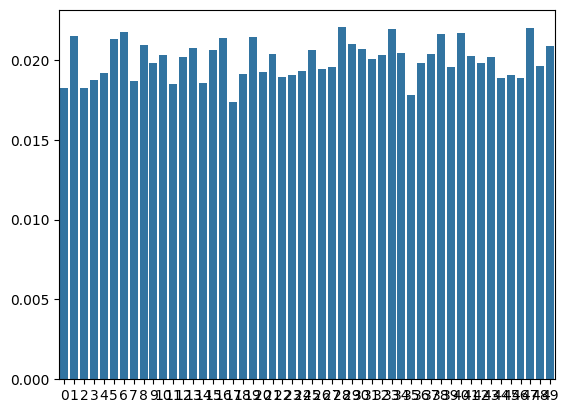

In [32]:
sns.barplot(mus)

In [33]:
global_cluster_labels

array([49, 49, 49, 49, 49, 49, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33,  8,  8,  8, 16, 16, 16, 16])